# コーディングセッション

# 目的
[boston house prices dataset](http://archive.ics.uci.edu/ml/datasets/Housing)を使ったモデル選択で遊んでみる。

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 

11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

# ルール

- グリッドサーチかランダムサーチを用いてハイパーパラメータの最適化を行う
- なんらかの情報を可視化する

# オプショナル

- 複数のモデルを比較する

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from sklearn import datasets

In [4]:
boston = datasets.load_boston()

In [5]:
X = boston.data
y = boston.target

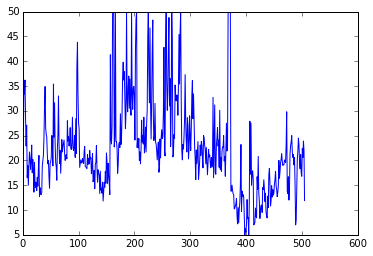

In [6]:
plt.plot(y)

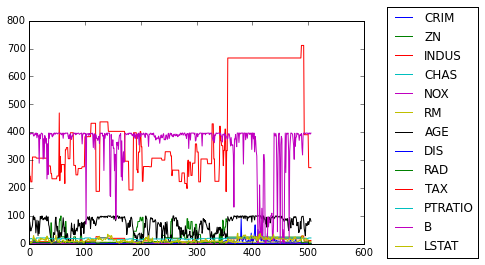

In [7]:
plt.plot(X);
plt.legend(boston.feature_names, loc='center left', bbox_to_anchor=(1.05, 0.5))

In [8]:
from sklearn import linear_model

In [9]:
np.random.seed(0)
indices = np.random.permutation(X.shape[0])
X = X[indices]
y = y[indices]

In [10]:
X.shape, y.shape

((506, 13), (506,))

In [11]:
from sklearn import cross_validation

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(404, 13) (404,)
(102, 13) (102,)


## データの前処理

In [14]:
from sklearn import preprocessing

In [15]:
scaler = preprocessing.StandardScaler()

In [16]:
X_train_ = scaler.fit_transform(X_train)

In [17]:
X_test_ = scaler.transform(X_test)

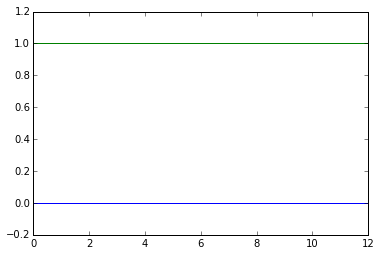

In [18]:
# 前処理されたトレーニングデータ
plt.plot(X_train_.mean(axis=0))
plt.plot(X_train_.std(axis=0))

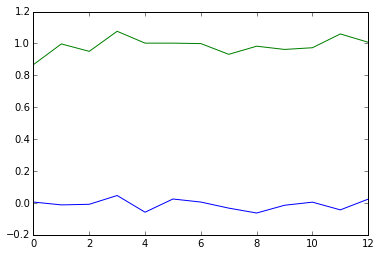

In [19]:
# 前処理されたテストデータ（トレーニングデータでフィッティングした前処理を適応）
plt.plot(X_test_.mean(axis=0))
plt.plot(X_test_.std(axis=0))

## グリッドサーチ

In [20]:
from sklearn.grid_search import GridSearchCV

In [21]:
from sklearn.svm import SVR

In [22]:
model = SVR()

In [23]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.0,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
param_grid = [
  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
  {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
  {'kernel': ['poly'], 'C': [1, 10], 'degree': [1, 2, 3, 4, 5]}
 ]

In [25]:
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}, {'kernel': ['poly'], 'C': [1, 10], 'degree': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [26]:
grid_search.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
grid_search.best_estimator_.score(X_test_, y_test)

0.87442032896594157

In [28]:
# CVで得られたベストなハイパーパラメータを使ってモデルをトレーニングしても
# 内部的には上と同じことをやっているので同じスコアが得られる
best_model = model.set_params(**grid_search.best_params_)
best_model.fit(X_train_, y_train)
best_model.score(X_test_, y_test)

0.87442032896594157

In [29]:
# ベストなスコアを含むすべてのスコア
grid_search.grid_scores_

[mean: 0.67329, std: 0.08273, params: {'kernel': 'linear', 'C': 1},
 mean: 0.67205, std: 0.08502, params: {'kernel': 'linear', 'C': 10},
 mean: 0.67122, std: 0.08563, params: {'kernel': 'linear', 'C': 100},
 mean: 0.67130, std: 0.08552, params: {'kernel': 'linear', 'C': 1000},
 mean: 0.16828, std: 0.08026, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001},
 mean: -0.03672, std: 0.06571, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001},
 mean: 0.55182, std: 0.09706, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001},
 mean: 0.17422, std: 0.08118, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001},
 mean: 0.69162, std: 0.08280, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.001},
 mean: 0.55200, std: 0.09712, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001},
 mean: 0.78165, std: 0.07131, params: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001},
 mean: 0.66808, std: 0.08654, params: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001},
 mean: 0.65149, std: 0.08313, params: {'kernel': 'poly', 

In [30]:
means = []
stds = []
params = []
for d in grid_search.grid_scores_:
    params.append(d[0])
    means.append(d[2].mean())
    stds.append(d[2].std())

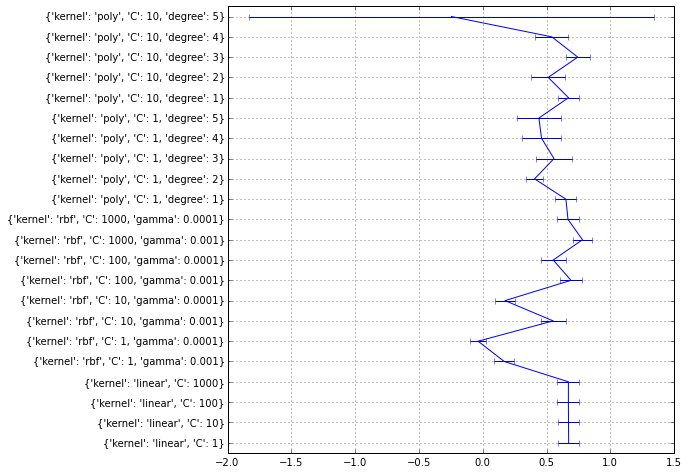

In [31]:
plt.figure(figsize=(8, 8))
plt.errorbar(means, np.arange(len(params)), xerr=stds);
plt.yticks(np.arange(len(params)), params);
plt.ylim(-0.5, len(params)-0.5)
plt.grid()

In [32]:
y_test_pred_grid = best_model.predict(X_test_)

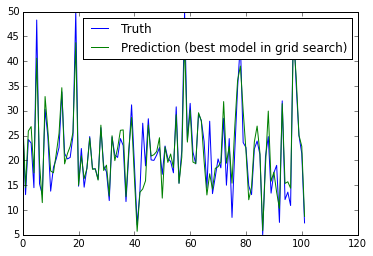

In [33]:
plt.plot(y_test, label='Truth')
plt.plot(y_test_pred_grid, label='Prediction (best model in grid search)')
plt.legend()

## ランダムサーチ

In [34]:
from sklearn.grid_search import RandomizedSearchCV

In [35]:
import scipy

In [36]:
param_dist = {'kernel': ['linear', 'rbf', 'poly'], 
             'C':  scipy.stats.expon(scale=100),
             'gamma': scipy.stats.expon(scale=.1),
             'degree': scipy.stats.randint(1, 5)}



  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
  {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
  {'kernel': ['poly'], 'C': [1, 10], 'degree': [1, 2, 3, 4, 5]}
 ]


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


In [37]:
# run randomized search
n_iter_search = 200
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1)

In [38]:
random_search.fit(X_train_, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf', 'poly'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10b5b2d90>, 'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10b598d10>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10b5b2190>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [39]:
random_search.best_params_

{'C': 350.9063495410845,
 'degree': 1,
 'gamma': 0.028556892682812147,
 'kernel': 'rbf'}

In [40]:
random_search.best_estimator_.score(X_test_, y_test)

0.87599797959686443

In [41]:
y_test_pred_rand = random_search.best_estimator_.predict(X_test_)

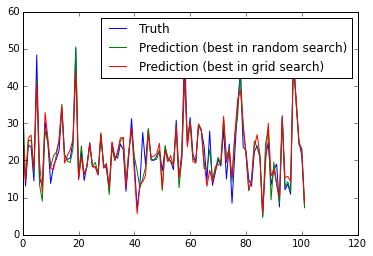

In [42]:
plt.plot(y_test, label='Truth')
plt.plot(y_test_pred_rand, label='Prediction (best in random search)')
plt.plot(y_test_pred_grid, label='Prediction (best in grid search)')
plt.legend()

In [43]:
# ベストなスコアを含むすべてのスコア
random_search.grid_scores_

[mean: 0.67633, std: 0.01219, params: {'kernel': 'linear', 'C': 4.563805361064566, 'gamma': 0.06749509660912366, 'degree': 3},
 mean: 0.75968, std: 0.01687, params: {'kernel': 'poly', 'C': 36.64512907003647, 'gamma': 0.05354043633037934, 'degree': 3},
 mean: 0.75207, std: 0.05589, params: {'kernel': 'rbf', 'C': 103.72451034370935, 'gamma': 0.15308484068610784, 'degree': 4},
 mean: 0.78081, std: 0.02739, params: {'kernel': 'rbf', 'C': 71.33842809551248, 'gamma': 0.015528558354816003, 'degree': 2},
 mean: 0.67484, std: 0.01046, params: {'kernel': 'linear', 'C': 32.51708750829961, 'gamma': 0.03940575717969755, 'degree': 1},
 mean: 0.77577, std: 0.03076, params: {'kernel': 'rbf', 'C': 20.7185180859494, 'gamma': 0.086493810965141, 'degree': 1},
 mean: 0.78955, std: 0.01479, params: {'kernel': 'rbf', 'C': 61.04828446278938, 'gamma': 0.008661699766504825, 'degree': 4},
 mean: 0.67502, std: 0.01055, params: {'kernel': 'linear', 'C': 128.79619768216824, 'gamma': 0.009811952440858075, 'degree': 

In [44]:
means = []
stds = []
params = []
for d in random_search.grid_scores_:
    params.append(d[0])
    means.append(d[2].mean())
    stds.append(d[2].std())

(0, 2)

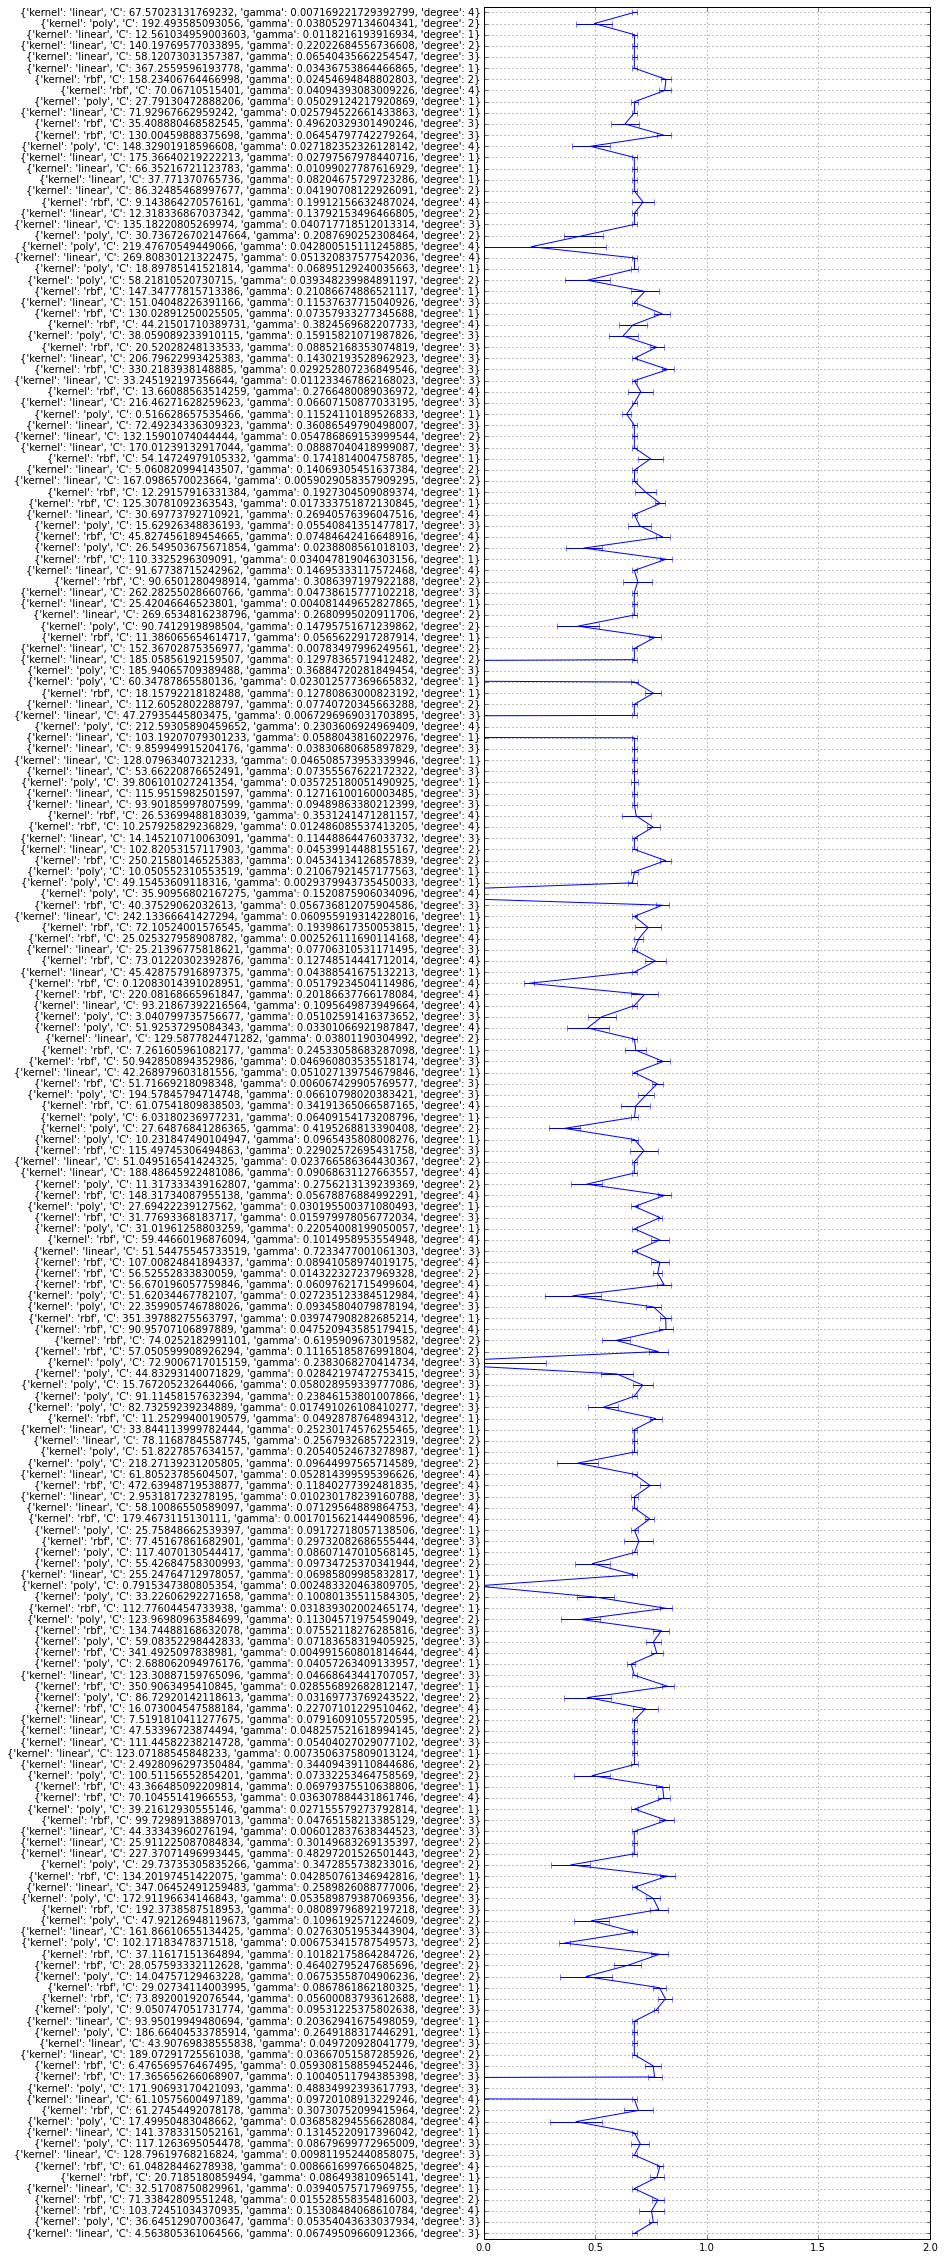

In [45]:
plt.figure(figsize=(8, 40))
plt.errorbar(means, np.arange(len(params)), xerr=stds);
plt.yticks(np.arange(len(params)), params);
plt.ylim(-0.5, len(params)-0.5)
plt.grid()
plt.xlim(0, 2)

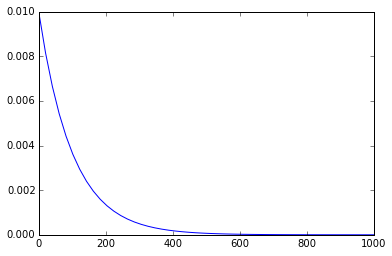

In [46]:
# 分布の形
expon = scipy.stats.expon(scale=100)
x = np.linspace(0, 1000)
y = expon.pdf(x)
plt.plot(x, y)